---
title: "Lecture 9: Rootfinding methods"
author: "Jamie Haddock"
format: 
    revealjs:
        output-file: Lecture9_slides
        slide-number: true
        chalkboard: 
            buttons: false
        preview-links: auto
        logo: figs/hmc.png
        css: input/slides.css
        incremental: true
        smaller: true
        code-fold: true
    html: 
        code-fold: true
    pdf:
        documentclass: article
        toc: true
        number-sections: true
        geometry:
          - top=1in
          - left=1in
          - bottom=1in
          - right=1in
format-links: false
jupyter: julia-1.9
filters: 
  - input/remove-pause.lua
execute:
  echo: true
  eval: true
---

# Rootfinding problems

*Many* problems in engineering, various sciences, data science, and machine learning can be rephrased as finding a root of a given function!  It is so important an archetypical problem that we study a variety of methods for this generic problem formulation, but you will see that many may be familiar from specific applications where they may go under different names.

## Rootfinding problem

::: {.callout-note icon=false}
## Definition: Rootfinding problem
Given a continuous function $\mathbf{f}$ of a variable input $\mathbf{v}$, the **rootfinding problem** is to find a real input $\mathbf{r}$, called a **root** such that $$\mathbf{f}(\mathbf{r}) = \mathbf{0}.$$
:::

. . .

In Calculus, you have likely already encountered such a problem.  In *optimization*, we often seek a *stationary point* of a given objective function as candidates for the maximizer or minimizer of a given function $L(\mathbf{x})$.  Mathematically, this is seeking $\mathbf{x}$ so that $$\nabla L(\mathbf{x}) = \mathbf{0}.$$

. . .

In this class, we'll focus on the case where the rootfinding problem is defined by continuous scalar function $f$ of a scalar variable; that is, we seek $r$ so that $$f(r) = 0.$$

## Conditioning, error, and residual

In the rootfinding problem, the data is the function $f$, and the result is a root.  How does the result change in response to perturbations in $f$?

[The perturbation to the function could be due to rounding in the evaluation of values of $f$, or evaluating $f$ may require computation via an inexact algorithm (sometimes evaluating relatively simple functions require complicated algorithms).  ]{.content-hidden when-format='revealjs' when-format='pptx'} 

. . .

Assum4 $f$ has at least one continous derivative near a roor $r$.  Suppose $f$ is perturbed to $\tilde{f}(x) = f(x) + \epsilon$ (constant perturbation).  As a result, the root (if it exists) will be perturbed to $\tilde{r} = r + \delta$ such that $\tilde{f}(\tilde{r}) = 0$.  We compute here an absolute condition number $\kappa_r$, which is the ratio $|\delta/\epsilon|$ as $\epsilon \rightarrow 0$.

. . .

Using Taylor's theorem, we have $$0 = \tilde{f}(\tilde{r}) = f(r + \delta) + \epsilon \approx f(r) + f'(r)\delta + \epsilon = f'(r)\delta + \epsilon.$$

::: {.callout-warning icon=false}
## Theorem: Condition number of rootfinding
If $f$ is differentiable at a root $r$, then the absolute condition number of $r$ with respect to constant changes in $f$ is $$\kappa_r = |f'(r)|^{-1}.$$  We say $\kappa_r = \infty$ if $f'(r) = 0$.  
:::

---

Let's see what this condition number looks like visually!

In [3]:
#| echo: false

using Plots

In [4]:
f = x -> (x-1)*(x-2);      # function of which we wish to find a root

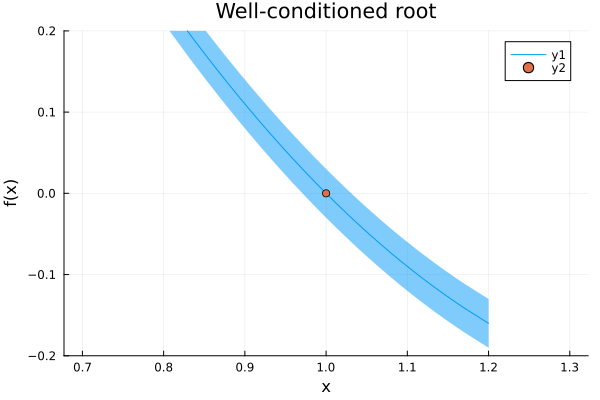

In [6]:
interval = [0.8, 1.2]
plot(f,interval...,ribbon=0.03, aspect_ratio=1, xlabel="x",yaxis=("f(x)",[-0.2,0.2]))
scatter!([1],[0],title="Well-conditioned root")

. . .

The possible values for the perturbed root lie within the intersection of the ribbon with the $x$-axis.  The width of this region is similar in length to the vertical thickness of the ribbon.

---

In [7]:
f = x -> (x-1)*(x-1.01);    #a new function for us to rootfind!

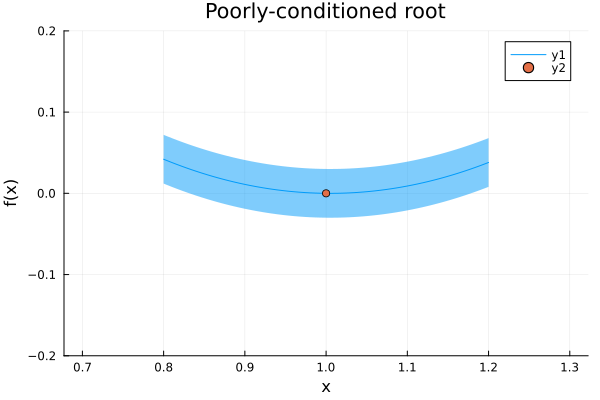

In [8]:
plot(f, interval...,ribbon=0.03,aspect_ratio=1, xlabel="x",yaxis=("f(x)",[-0.2,0.2]))
scatter!([1],[0],title="Poorly-conditioned root")

. . .

The bound on the constant perturbation to $f$ (the vertical width of the band) is the same as before, but now the potential displacement of the root (the horizontal width of the intersection of the band with the $x$-axis) is much wider!  In fact, the root could even cease to exist under possible perturbations.

---

If $|f'|$ is small at the root, it may not be possible to get a small error in a computed estimate of the root.  We can't measure this error, but, as usual, can measure the **residual**.

::: {.callout-note icon=false}
## Definition: Rootfinding residual
If $\tilde{r}$ approximates a root $r$ of function $f$, then the **residual** at $\tilde{r}$ is $f(\tilde{r})$.
:::

. . .

Define $g(x) = f(x) - f(\tilde{r})$ and note that $\tilde{r}$ is a root of $g$.  Next, note then that $f(\tilde{r}) = g(x) - f(x)$, so we see that the residual is the distance of $f$ to an exactly solved rootfinding problem.  This is the backward error!

. . .

::: {.callout-warning icon=false}
## Fact: 
The backward error in a root estimate is equal to the residual.
:::

. . .

To summarize -- we can't expect a small error in a root approximation if the condition number is large, but we can gauge the backward error from the residual!

# Fixed-point iteration

We typically employ iterative methods to approximate a solution to the rootfinding problem.  The first method relies on a reformulation of the rootfinding problem as a **fixed-point problem**.

# Fixed-point iterative method

::: {.callout-note icon=false}
## Definition: Fixed-point problem
Given a function $g$, the **fixed-point problem** is to find a value $p$, called a **fixed point**, such that $g(p) = p$.
:::

<!--
[verbose test]{.content-hidden when-format="revealjs" when-format="pptx"}

::: {.callout-caution icon=false}
## Exercise: 

:::

<details><summary>Answer:</summary> </details>


::: {.callout-note icon=false}
## Definition: 
 
:::


::: {.callout-tip icon=false}
## Note: 
 
:::
-->